In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from pandas.plotting import table 
from datetime import datetime, timedelta

# Data

## Collection

In [2]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

confirmed_cases  = pd.read_csv(confirmed_url)
deaths = pd.read_csv(deaths_url)
recovered_cases = pd.read_csv(recovered_url)

confirmed_cases.rename(columns={"Province/State":"Prov", "Country/Region":"Country"}, inplace=True)
deaths.rename(columns={"Province/State":"Prov", "Country/Region":"Country"}, inplace=True)
recovered_cases.rename(columns={"Province/State":"Prov", "Country/Region":"Country"}, inplace=True)

countries = confirmed_cases["Country"].unique()

# add overral summary
confirmed_cases.loc["Total"] = confirmed_cases.sum()
confirmed_cases.iloc[-1,1] = "Worldwide"
deaths.loc["Total"] = deaths.sum()
deaths.iloc[-1,1] = "Worldwide"
recovered_cases.loc["Total"] = recovered_cases.sum()
recovered_cases.iloc[-1,1] = "Worldwide"

total_infected = confirmed_cases.sum()[-1]
total_dead = deaths.sum()[-1]
total_recovered = recovered_cases.sum()[-1]
total_removed = total_recovered + total_dead + total_infected

## Inspection

### Dataframe peek

In [3]:
confirmed_cases.tail(5)

,Prov,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20
262,NaN,Yemen,15.552727,48.516388,0.0,0.0,0.0,0.0,0.0,0.0,...,885.0,902.0,909.0,919.0,922.0,941.0,967.0,992.0,1015.0,1076.0
263,NaN,Comoros,-11.645500,43.333300,0.0,0.0,0.0,0.0,0.0,0.0,...,197.0,197.0,210.0,210.0,247.0,247.0,247.0,265.0,265.0,272.0
264,NaN,Tajikistan,38.861034,71.276093,0.0,0.0,0.0,0.0,0.0,0.0,...,5160.0,5221.0,5279.0,5338.0,5399.0,5457.0,5513.0,5567.0,5630.0,5691.0
265,NaN,Lesotho,-29.609988,28.233608,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,12.0,17.0,17.0,17.0
Total,NaN,Worldwide,5625.379563,5995.278262,555.0,654.0,941.0,1434.0,2118.0,2927.0,...,8173940.0,8349950.0,8488976.0,8670323.0,8829186.0,8960607.0,9098643.0,9263935.0,9431350.0,9609829.0


In [4]:
def graphData(df, name):
    country = df[df["Country"] == name].groupby("Country").sum()
    graph = country.iloc[0,2:len(df)]
    return graph, graph.index 

In [5]:
x, y = graphData(confirmed_cases, "Worldwide")

In [6]:
x.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/16/20', '6/17/20', '6/18/20', '6/19/20', '6/20/20', '6/21/20',
       '6/22/20', '6/23/20', '6/24/20', '6/25/20'],
      dtype='object', length=156)

In [7]:
y

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/16/20', '6/17/20', '6/18/20', '6/19/20', '6/20/20', '6/21/20',
       '6/22/20', '6/23/20', '6/24/20', '6/25/20'],
      dtype='object', length=156)

In [8]:
x[x.index == '1/24/20']

1/24/20    941.0
Name: Worldwide, dtype: float64

### Country data

In [9]:
country_example = confirmed_cases[confirmed_cases["Country"] == "China"].groupby("Country").sum()
country_example

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20
Country,,,,,,,,,,,,,,,,,,,,,
China,1083.3367,3684.4197,548.0,643.0,920.0,1406.0,2075.0,2877.0,5509.0,6087.0,...,84422.0,84458.0,84494.0,84494.0,84553.0,84572.0,84624.0,84653.0,84673.0,84701.0


In [10]:
confirmed_cases[confirmed_cases["Country"] == 'China']

,Prov,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20
49,Anhui,China,31.8257,117.2264,1.0,9.0,15.0,39.0,60.0,70.0,...,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0
50,Beijing,China,40.1824,116.4142,14.0,22.0,36.0,41.0,68.0,80.0,...,731.0,752.0,777.0,777.0,821.0,830.0,843.0,850.0,863.0,874.0
51,Chongqing,China,30.0572,107.8740,6.0,9.0,27.0,57.0,75.0,110.0,...,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0
52,Fujian,China,26.0789,117.9874,1.0,5.0,10.0,18.0,35.0,59.0,...,362.0,362.0,362.0,362.0,363.0,363.0,363.0,363.0,363.0,363.0
53,Gansu,China,37.8099,101.0583,0.0,2.0,2.0,4.0,7.0,14.0,...,149.0,150.0,151.0,151.0,151.0,151.0,158.0,158.0,161.0,161.0
54,Guangdong,China,23.3417,113.4244,26.0,32.0,53.0,78.0,111.0,151.0,...,1628.0,1628.0,1631.0,1631.0,1634.0,1634.0,1634.0,1634.0,1635.0,1635.0
55,Guangxi,China,23.8298,108.7881,2.0,5.0,23.0,23.0,36.0,46.0,...,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0
56,Guizhou,China,26.8154,106.8748,1.0,3.0,3.0,4.0,5.0,7.0,...,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0
57,Hainan,China,19.1959,109.7453,4.0,5.0,8.0,19.0,22.0,33.0,...,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0
58,Hebei,China,39.5490,116.1306,1.0,1.0,2.0,8.0,13.0,18.0,...,336.0,338.0,340.0,340.0,344.0,346.0,346.0,348.0,349.0,349.0


In [11]:
countries_unique=confirmed_cases["Country"].unique()

In [12]:
def getCases(df, country, date):
    y, x = graphData(df, country)
    return y[y.index == date]

In [13]:
getCases(confirmed_cases, "China", '1/24/20')

1/24/20    920.0
Name: China, dtype: float64

In [14]:
confirmed_cases.sum()[-1]

19219658.0

# The SEIR Model

* Susceptible
* Exposed (latent infectivity)
* Infectious
* Recovered/Removed 

## implicit model

In [15]:
from assumptions import assumption_constants

def seirImplicit(meetings, infection_prob, removed_pop, infected_inp, latent_period, infectivity_period):
    if meetings is None:
        meetings = 1
    if infected_inp is None:
        infected_inp = 1
    if removed_pop is None:
        removed_pop = 1

    h = 1 # step size in days

    end_time = 400.0
    num_steps = int(end_time / h)
    times = h * np.array(range(num_steps + 1))

    s = np.zeros(num_steps + 1)
    e = np.zeros(num_steps + 1)
    i = np.zeros(num_steps + 1)
    r = np.zeros(num_steps + 1)

    s[0] = 7.8e9 - removed_pop
    e[0] = 0. 
    i[0] = float(infected_inp)
    r[0] = removed_pop 

    transmission_coeff = ((float(infection_prob) / 100) * meetings) / 7.8e9

    for step in range(num_steps):
        s2e = h * transmission_coeff * s[step] * i[step]
        e2i = h / latent_period * e[step]
        i2r = h / infectivity_period * i[step]

        p = ((1.0 + h / infectivity_period) / (h * transmission_coeff) + i[step]) / (h / latent_period) - (s[step] + e[step]) / (1.0 + h / latent_period) 
        q = -((1.0 + h / infectivity_period) / (h * transmission_coeff) * e[step] + (s[step] + e[step]) * i[step]) / ((1.0 + h / latent_period) * (h / latent_period))
        e[step + 1] = e[step + 1] = -0.5 * p + math.sqrt(0.25 * p * p - q)
        i[step + 1] = (i[step] + (h / latent_period) * e[step + 1]) / (1. + h / infectivity_period)
        s[step + 1] = (s[step]) / (1. + h * transmission_coeff * i[step + 1])
        r[step + 1] = r[step] + (h / infectivity_period * i[step + 1])
    
    s_plot = plt.plot(times, s, label = 'S')
    e_plot = plt.plot(times, e, label = 'E')
    i_plot = plt.plot(times, i, label = 'I')
    r_plot = plt.plot(times, r, label = 'R')
    plt.legend(('S', 'E', 'I', 'R'), loc = 'upper right')
    
    axes = plt.gca()
    axes.set_xlabel('Days')
    axes.set_ylabel('Number')
    plt.xlim(xmin = 0.)
    plt.ylim(ymin = 0.)
    
    return pd.Series(s), pd.Series(e), pd.Series(i), pd.Series(r), times

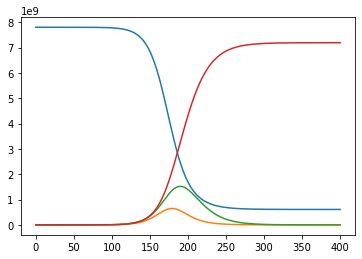

In [16]:
s, e, i, r, time = seirImplicit(
    meetings=assumption_constants['meetings'],
    infection_prob=assumption_constants['infection_prob'],
    removed_pop=6624,
    infected_inp=6334,
    latent_period=assumption_constants['latent_period'],
    infectivity_period=assumption_constants['infectivity_period']
)

In [17]:
i

0        6334.000000
1        6098.349300
2        6032.414115
3        6101.755160
4        6281.395339
           ...      
396    183948.614839
397    175127.149878
398    166728.710012
399    158733.011182
400    151120.741784
Length: 401, dtype: float64

In [18]:
def seirDf(s, e, i, r):
    seir_df = pd.DataFrame(data=s, columns={"Susceptible"})
    seir_df["Exposed"] = e
    seir_df["Infected"] = i
    seir_df["Removed"] = r
    return seir_df.iloc[::25, :]

In [19]:
seir_dataframe = seirDf(s, e, i, r)
seir_dataframe

,Susceptible,Exposed,Infected,Removed
0,7.799993e+09,0.000000e+00,6.334000e+03,6.624000e+03
25,7.799927e+09,2.076744e+04,2.803307e+04,3.021670e+04
50,7.799486e+09,1.413752e+05,1.908144e+05,1.876646e+05
75,7.796487e+09,9.617752e+05,1.298389e+06,1.259208e+06
100,7.776137e+09,6.517563e+06,8.811504e+06,8.540354e+06
125,7.640743e+09,4.302645e+07,5.874393e+07,5.749299e+07
150,6.844408e+09,2.408419e+08,3.498174e+08,3.649391e+08
175,4.199606e+09,6.345221e+08,1.225346e+09,1.740532e+09
200,1.690251e+09,3.939725e+08,1.393103e+09,4.322679e+09
225,8.887141e+08,1.087512e+08,6.647722e+08,6.137769e+09


## Use SEIR for predicting city data

In [20]:
from cities import city_data

Munich
Zurich
Montpellier
Barcelona
Lyon
Geneva
Alsance
Avignon
Pyrenees
Ceveness
Black forest
Mayrhofen
Bozen
Castellane
Girona
Rodez
Charmonix
St.Moritz
Genoa
Marseille
Bayonne
Bordeaux
Saint Etienne
Mailand
Paris
Strasbourg


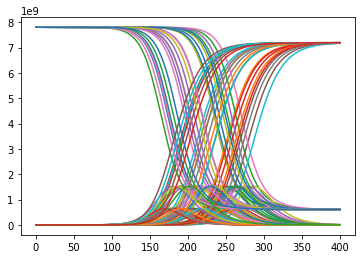

In [21]:
city_d = {}
for city_name in city_data:
    print(city_name)
    s_city, e_city, i_city, r_city, time_city = seirImplicit(
        meetings=assumption_constants['meetings'],
        infection_prob=assumption_constants['infection_prob'],
        removed_pop=city_data[city_name]['dead'] + city_data[city_name]['healed'],
        infected_inp=city_data[city_name]['infected'],
        latent_period=assumption_constants['latent_period'],
        infectivity_period=assumption_constants['infectivity_period']
    )
    
    city_d[city_name] = {
        'susceptible': s_city,
        'estimated': e_city,
        'infected': i_city,
        'removed': r_city
    }


In [22]:
city_name = 'Munich'
df_city = pd.DataFrame({city_name: city_d[city_name]['infected'].values})
transposed_df_city = df_city.T
transposed_df_city


,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
Munich,6624.0,6377.560118,6308.60612,6381.121929,6568.986881,6853.515657,7221.628915,7664.494473,8176.519724,8754.606287,...,228537.035714,217577.402172,207143.316341,197209.579257,187752.199947,178748.337544,170176.246174,162015.222484,154245.555673,146848.479925


In [23]:
d_cities_infected = {}
for i, city_name in enumerate(city_data):
    d_cities_infected[city_name] = city_d[city_name]['infected'].values


df = pd.DataFrame.from_dict(d_cities_infected,orient='index')
df = df.reset_index()
df.rename(columns={ df.columns[0]: "city" }, inplace = True)
df

,city,0,1,2,3,4,5,6,7,8,...,391,392,393,394,395,396,397,398,399,400
0,Munich,6624.0,6377.560118,6308.606120,6381.121929,6568.986881,6853.515657,7221.628915,7664.494473,8176.519724,...,2.285370e+05,2.175774e+05,2.071433e+05,1.972096e+05,1.877522e+05,1.787483e+05,1.701762e+05,1.620152e+05,1.542456e+05,1.468485e+05
1,Zurich,931.0,896.363016,886.671611,896.863742,923.268168,963.258676,1014.996975,1077.241714,1149.206859,...,8.031231e+05,7.646143e+05,7.279517e+05,6.930466e+05,6.598149e+05,6.281765e+05,5.980549e+05,5.693774e+05,5.420749e+05,5.160814e+05
2,Montpellier,209.0,201.224352,199.048735,201.336768,207.264298,216.241762,227.856487,241.829801,257.985248,...,2.090501e+06,1.990296e+06,1.894892e+06,1.804059e+06,1.717578e+06,1.635240e+06,1.556849e+06,1.482214e+06,1.411155e+06,1.343502e+06
3,Barcelona,6155.0,5926.008831,5861.936985,5929.318439,6103.881956,6368.265197,6710.314880,7121.824176,7597.596449,...,2.395444e+05,2.280569e+05,2.171203e+05,2.067082e+05,1.967953e+05,1.873578e+05,1.783728e+05,1.698188e+05,1.616749e+05,1.539215e+05
4,Lyon,1219.0,1173.648246,1160.958855,1174.303868,1208.876362,1261.237719,1328.980985,1410.480799,1504.707974,...,6.757922e+05,6.433878e+05,6.125369e+05,5.831651e+05,5.552015e+05,5.285786e+05,5.032322e+05,4.791011e+05,4.561269e+05,4.342543e+05
5,Geneva,5251.0,5055.641358,5000.979965,5058.465032,5207.390100,5432.942881,5724.755079,6075.825229,6481.719945,...,2.652006e+05,2.524829e+05,2.403750e+05,2.288477e+05,2.178731e+05,2.074249e+05,1.974776e+05,1.880074e+05,1.789913e+05,1.704076e+05
6,Alsance,454.0,437.109356,432.383367,437.353539,450.229601,469.730885,494.960955,525.314467,560.408113,...,1.272107e+06,1.211118e+06,1.153052e+06,1.097770e+06,1.045137e+06,9.950267e+05,9.473186e+05,9.018974e+05,8.586536e+05,8.174828e+05
7,Avignon,63.0,60.656144,60.000334,60.690025,62.476787,65.182910,68.683998,72.896046,77.765868,...,4.503997e+06,4.288233e+06,4.082795e+06,3.887188e+06,3.700945e+06,3.523616e+06,3.354776e+06,3.194020e+06,3.040961e+06,2.895231e+06
8,Pyrenees,7.0,6.739573,6.666706,6.743337,6.941863,7.242541,7.631550,8.099554,8.640642,...,1.833600e+07,1.746064e+07,1.662688e+07,1.583277e+07,1.507644e+07,1.435610e+07,1.367005e+07,1.301668e+07,1.239443e+07,1.180184e+07
9,Ceveness,4.0,3.851183,3.809544,3.853334,3.966778,4.138595,4.360885,4.628316,4.937512,...,2.618759e+07,2.493985e+07,2.375119e+07,2.261884e+07,2.154017e+07,2.051267e+07,1.953392e+07,1.860165e+07,1.771366e+07,1.686787e+07


In [24]:
df.to_csv('city.csv', index=False)

In [25]:
d_cities_removed = {}
for i, city_name in enumerate(city_data):
    d_cities_removed[city_name] = city_d[city_name]['removed'].values


df = pd.DataFrame.from_dict(d_cities_removed, orient='index')
df = df.reset_index()
df.rename(columns={ df.columns[0]: "city" }, inplace = True)
df

,city,0,1,2,3,4,5,6,7,8,...,391,392,393,394,395,396,397,398,399,400
0,Munich,6334.0,6789.540008,7240.154731,7695.949155,8165.162503,8654.699336,9170.529973,9717.993864,10302.030987,...,7.189514e+09,7.189530e+09,7.189544e+09,7.189559e+09,7.189572e+09,7.189585e+09,7.189597e+09,7.189608e+09,7.189619e+09,7.189630e+09
1,Zurich,920.0,984.025930,1047.359616,1111.421312,1177.369038,1246.173229,1318.673013,1395.618850,1477.705054,...,7.188693e+09,7.188748e+09,7.188800e+09,7.188849e+09,7.188896e+09,7.188941e+09,7.188984e+09,7.189025e+09,7.189063e+09,7.189100e+09
2,Montpellier,196.0,210.373168,224.590935,238.972133,253.776725,269.222565,285.498029,302.771586,321.199104,...,7.186866e+09,7.187008e+09,7.187144e+09,7.187272e+09,7.187395e+09,7.187512e+09,7.187623e+09,7.187729e+09,7.187830e+09,7.187926e+09
3,Barcelona,6692.0,7115.286345,7533.996130,7957.518875,8393.510444,8848.386529,9327.694735,9836.396462,10379.081922,...,7.189498e+09,7.189514e+09,7.189530e+09,7.189544e+09,7.189558e+09,7.189572e+09,7.189585e+09,7.189597e+09,7.189608e+09,7.189619e+09
4,Lyon,991.0,1074.832018,1157.757650,1241.636498,1327.984809,1418.073218,1513.000431,1613.749060,1721.228201,...,7.188874e+09,7.188920e+09,7.188964e+09,7.189005e+09,7.189045e+09,7.189083e+09,7.189119e+09,7.189153e+09,7.189185e+09,7.189216e+09
5,Geneva,5248.0,5609.117240,5966.330094,6327.649025,6699.605461,7087.672810,7496.583887,7930.571403,8393.551399,...,7.189461e+09,7.189479e+09,7.189496e+09,7.189512e+09,7.189528e+09,7.189543e+09,7.189557e+09,7.189570e+09,7.189583e+09,7.189595e+09
6,Alsance,385.0,416.222097,447.106623,478.346162,510.505419,544.057625,579.411979,616.934441,656.963592,...,7.188027e+09,7.188114e+09,7.188196e+09,7.188275e+09,7.188349e+09,7.188420e+09,7.188488e+09,7.188552e+09,7.188614e+09,7.188672e+09
7,Avignon,49.0,53.332582,57.618320,61.953322,66.415949,71.071871,75.977871,81.184732,86.739437,...,7.183441e+09,7.183747e+09,7.184039e+09,7.184316e+09,7.184581e+09,7.184832e+09,7.185072e+09,7.185300e+09,7.185517e+09,7.185724e+09
8,Pyrenees,7.0,7.481398,7.957591,8.439258,8.935106,9.452430,9.997541,10.576080,11.193269,...,7.163767e+09,7.165015e+09,7.166202e+09,7.167333e+09,7.168410e+09,7.169436e+09,7.170412e+09,7.171342e+09,7.172227e+09,7.173070e+09
9,Ceveness,4.0,4.275085,4.547195,4.822433,5.105774,5.401388,5.712880,6.043474,6.396153,...,7.152568e+09,7.154349e+09,7.156046e+09,7.157661e+09,7.159200e+09,7.160665e+09,7.162060e+09,7.163389e+09,7.164654e+09,7.165859e+09


In [26]:
df.insert(1, "population", 0) 
for i, city_name in enumerate(city_data):
    df["population"][i] = city_data[city_name]['total']

df

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,city,population,0,1,2,3,4,5,6,7,...,391,392,393,394,395,396,397,398,399,400
0,Munich,1400000,6334.0,6789.540008,7240.154731,7695.949155,8165.162503,8654.699336,9170.529973,9717.993864,...,7.189514e+09,7.189530e+09,7.189544e+09,7.189559e+09,7.189572e+09,7.189585e+09,7.189597e+09,7.189608e+09,7.189619e+09,7.189630e+09
1,Zurich,400000,920.0,984.025930,1047.359616,1111.421312,1177.369038,1246.173229,1318.673013,1395.618850,...,7.188693e+09,7.188748e+09,7.188800e+09,7.188849e+09,7.188896e+09,7.188941e+09,7.188984e+09,7.189025e+09,7.189063e+09,7.189100e+09
2,Montpellier,270000,196.0,210.373168,224.590935,238.972133,253.776725,269.222565,285.498029,302.771586,...,7.186866e+09,7.187008e+09,7.187144e+09,7.187272e+09,7.187395e+09,7.187512e+09,7.187623e+09,7.187729e+09,7.187830e+09,7.187926e+09
3,Barcelona,5500000,6692.0,7115.286345,7533.996130,7957.518875,8393.510444,8848.386529,9327.694735,9836.396462,...,7.189498e+09,7.189514e+09,7.189530e+09,7.189544e+09,7.189558e+09,7.189572e+09,7.189585e+09,7.189597e+09,7.189608e+09,7.189619e+09
4,Lyon,513000,991.0,1074.832018,1157.757650,1241.636498,1327.984809,1418.073218,1513.000431,1613.749060,...,7.188874e+09,7.188920e+09,7.188964e+09,7.189005e+09,7.189045e+09,7.189083e+09,7.189119e+09,7.189153e+09,7.189185e+09,7.189216e+09
5,Geneva,499000,5248.0,5609.117240,5966.330094,6327.649025,6699.605461,7087.672810,7496.583887,7930.571403,...,7.189461e+09,7.189479e+09,7.189496e+09,7.189512e+09,7.189528e+09,7.189543e+09,7.189557e+09,7.189570e+09,7.189583e+09,7.189595e+09
6,Alsance,70000,385.0,416.222097,447.106623,478.346162,510.505419,544.057625,579.411979,616.934441,...,7.188027e+09,7.188114e+09,7.188196e+09,7.188275e+09,7.188349e+09,7.188420e+09,7.188488e+09,7.188552e+09,7.188614e+09,7.188672e+09
7,Avignon,92000,49.0,53.332582,57.618320,61.953322,66.415949,71.071871,75.977871,81.184732,...,7.183441e+09,7.183747e+09,7.184039e+09,7.184316e+09,7.184581e+09,7.184832e+09,7.185072e+09,7.185300e+09,7.185517e+09,7.185724e+09
8,Pyrenees,8000,7.0,7.481398,7.957591,8.439258,8.935106,9.452430,9.997541,10.576080,...,7.163767e+09,7.165015e+09,7.166202e+09,7.167333e+09,7.168410e+09,7.169436e+09,7.170412e+09,7.171342e+09,7.172227e+09,7.173070e+09
9,Ceveness,12000,4.0,4.275085,4.547195,4.822433,5.105774,5.401388,5.712880,6.043474,...,7.152568e+09,7.154349e+09,7.156046e+09,7.157661e+09,7.159200e+09,7.160665e+09,7.162060e+09,7.163389e+09,7.164654e+09,7.165859e+09


In [27]:
df.to_csv('city_removed.csv', index=False)